In [6]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import re

In [7]:
nodes = pd.read_csv('nodes.csv').loc[:,['id','label','born','died','continental','analytic']]
nodes = nodes[(nodes.continental == 1) | (nodes.analytic == 1)]
lone_nodes = ['n130', 'n478','n486','n489']
nodes = nodes[(nodes.id.isin(lone_nodes) == False)]

edges = pd.read_csv('edges.csv')
edges = edges[(edges['from'].isin(nodes.id)) & (edges['to'].isin(nodes.id))]

In [8]:
edges.to_csv('dedges.csv')

In [10]:
G = nx.Graph() 
color_map = []

for index, row in nodes.iterrows():

    if row.continental == 1:
        color_map.append('blue')
    elif row.analytic == 1:
        color_map.append('red')
    else: color_map.append('yellow')

    G.add_node(
        row.id, 
        label = row.label,
        born = row.born,
        died = row.died
    )

for index, row in edges.iterrows():

    G.add_edge(row['from'], row['to'])

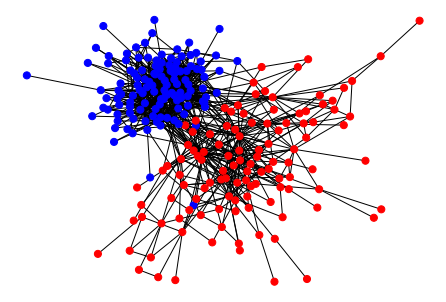

In [11]:
pos = nx.spring_layout(G)

options = {
    'node_color': color_map,
    'node_size': 50,
    'width': 1
}
nx.draw(G, **options, with_labels=False, pos = pos)

In [13]:
def create_comms(partition, name):

    ordered = []
    done = False

    if type(partition) is not tuple:
        while not done:
            done = True
            for g in range(0,len(partition)-1):
                if len(partition[g]) < len(partition[g+1]):
                    temp = partition[g+1]
                    partition[g+1] = partition[g]
                    partition[g] = temp
                    done = False

    for g in range(0,len(partition)):
        comm = name + str(g)
        nodes[comm] = [1 if n in list(partition[g]) else 0 for n in nodes.id]

def iter_comms(iterator, name):
    array = []
    for i in iterator:
        array.append(list(i))
    
    create_comms(array, name)


In [14]:
create_comms(community.kernighan_lin_bisection(G), 'klb')
create_comms(community.greedy_modularity_communities(G), 'cnm')
iter_comms(community.label_propagation_communities(G), 'lab')
iter_comms(community.asyn_lpa_communities(G, seed = 1), 'alab')
iter_comms(community.asyn_fluidc(G, 2, seed = 1), 'aflu')
gnew = community.girvan_newman(G)
create_comms(list(sorted(c) for c in next(gnew)), 'gnew')

In [15]:
display(nodes)

,id,label,born,died,continental,analytic,klb0,klb1,cnm0,cnm1,...,alab3,alab4,alab5,alab6,alab7,alab8,aflu0,aflu1,gnew0,gnew1
21,n22,Edmund Husserl,1859-04-08 00:00:00,1938-04-27 00:00:00,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
51,n52,Bertrand Russell,1872-05-18 00:00:00,1970-02-02 00:00:00,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
54,n55,Martin Heidegger,1889-09-26 00:00:00,1976-05-26 00:00:00,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
56,n57,Xavier Zubiri,1898-12-04 00:00:00,1983-09-21 00:00:00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
62,n63,Georg Wilhelm Friedrich Hegel,1770-08-27 00:00:00,1831-11-14 00:00:00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,n673,David Stove,1927-09-15 00:00:00,1994-06-02 00:00:00,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
675,n676,Mladen Dolar,1951-01-29 00:00:00,NaN,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
686,n687,Stephen Darwall,1946-01-01,NaN,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
689,n690,Patrick Suppes,1922-03-17 00:00:00,2014-11-17 00:00:00,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,1,0


In [29]:
comms = []
for index, row in nodes.iterrows():
    comms.append(','.join(list(row[row == 1].keys())))
nodes['comms'] = comms

In [31]:
display(nodes)
nodes.to_csv('dnodes.csv')

,id,label,born,died,continental,analytic,klb0,klb1,cnm0,cnm1,...,alab4,alab5,alab6,alab7,alab8,aflu0,aflu1,gnew0,gnew1,comms
21,n22,Edmund Husserl,1859-04-08 00:00:00,1938-04-27 00:00:00,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,"continental,klb0,cnm1,lab0,alab0,aflu0,gnew0"
51,n52,Bertrand Russell,1872-05-18 00:00:00,1970-02-02 00:00:00,0,1,1,0,1,0,...,0,0,0,0,0,0,1,1,0,"analytic,klb0,cnm0,lab1,alab1,aflu1,gnew0"
54,n55,Martin Heidegger,1889-09-26 00:00:00,1976-05-26 00:00:00,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,"continental,klb1,cnm1,lab0,alab0,aflu0,gnew0"
56,n57,Xavier Zubiri,1898-12-04 00:00:00,1983-09-21 00:00:00,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,"continental,klb1,cnm2,lab0,alab0,aflu0,gnew0"
62,n63,Georg Wilhelm Friedrich Hegel,1770-08-27 00:00:00,1831-11-14 00:00:00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,"continental,klb1,cnm2,lab0,alab0,aflu1,gnew0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,n673,David Stove,1927-09-15 00:00:00,1994-06-02 00:00:00,0,1,1,0,1,0,...,0,0,0,0,0,0,1,1,0,"analytic,klb0,cnm0,lab1,alab1,aflu1,gnew0"
675,n676,Mladen Dolar,1951-01-29 00:00:00,NaN,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,"continental,klb0,cnm2,lab0,alab0,aflu1,gnew0"
686,n687,Stephen Darwall,1946-01-01,NaN,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,"analytic,klb1,cnm3,lab5,alab6,aflu0,gnew1"
689,n690,Patrick Suppes,1922-03-17 00:00:00,2014-11-17 00:00:00,0,1,0,1,1,0,...,0,0,0,0,1,0,1,1,0,"analytic,klb1,cnm0,lab6,alab8,aflu1,gnew0"


In [16]:
def color_gen(name, title):

    color_map = []

    for index, row in nodes.iterrows():
        if row[name + '0'] == 1:
            color_map.append('blue')
        elif row[name + '1'] == 1:
            color_map.append('red')
        else: color_map.append('yellow')

    nx.draw(G, **options, with_labels=False, pos = pos)
    plt.title(title)
    plt.show()
    display(pd.crosstab(nodes.continental, nodes[name + '0'], rownames = ['Actual'], colnames = ['Predicted']))

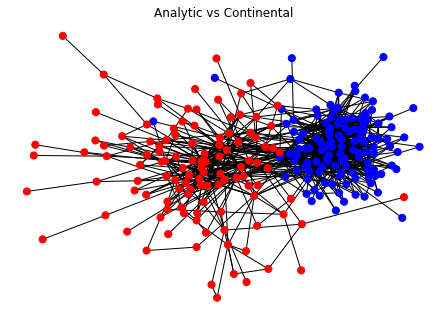

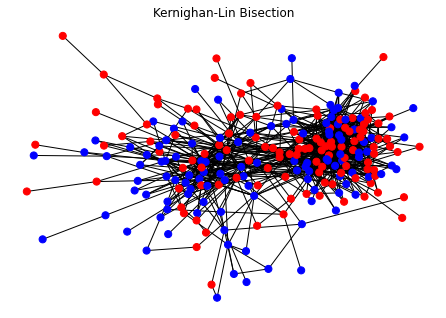

Predicted,0,1
Actual,,
0,52,63
1,66,54


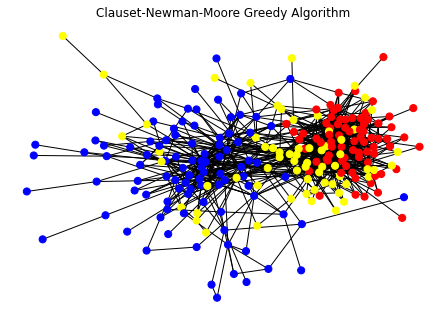

Predicted,0,1
Actual,,
0,22,93
1,117,3


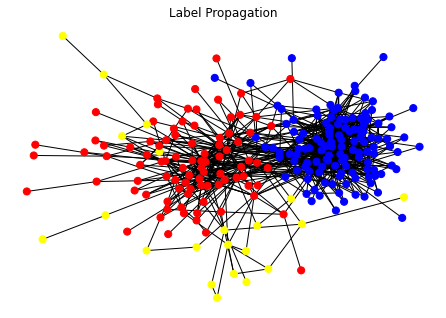

Predicted,0,1
Actual,,
0,109,6
1,2,118


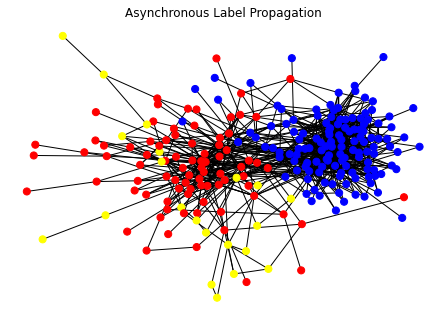

Predicted,0,1
Actual,,
0,103,12
1,2,118


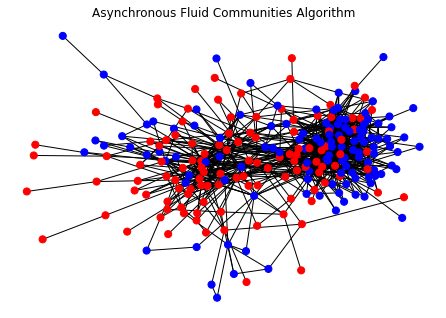

Predicted,0,1
Actual,,
0,76,39
1,40,80


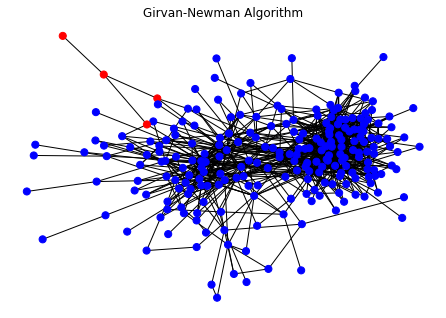

Predicted,0,1
Actual,,
0,4,111
1,0,120


In [263]:
nx.draw(G, **options, with_labels=False, pos = pos)
plt.title('Analytic vs Continental')
plt.show()

color_gen('klb', 'Kernighan-Lin Bisection')
color_gen('cnm', 'Clauset-Newman-Moore Greedy Algorithm')
color_gen('lab', 'Label Propagation')
color_gen('alab', 'Asynchronous Label Propagation')
color_gen('aflu', 'Asynchronous Fluid Communities Algorithm')
color_gen('gnew', 'Girvan-Newman Algorithm')